In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [111]:
%matplotlib inline

In [112]:
plt.style.use(['ggplot', 'seaborn-talk'])

## Loading DataSet

In [113]:
df = sns.load_dataset('mpg')

In [114]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.drop(labels=['origin', 'name'], axis=1, inplace=True)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [26]:
x=df.drop(labels='mpg', axis=1)
y=df['mpg']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( df.drop('mpg', axis=1), df['mpg'],random_state=2021)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 6), (100, 6), (298,), (100,))

In [14]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(missing_values=np.nan)

In [64]:
x_train_processed = imputer.fit_transform(X_train)
x_test_processed = imputer.transform(X_test)

### Scaling Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

x_train_processed = scaler.fit_transform(x_train_processed)
x_test_processed = scaler.transform(x_test_processed)

In [71]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
linreg = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV()

In [81]:
linreg.fit(x_train_processed, y_train)
ridge.fit(x_train_processed, y_train)
lasso.fit(x_train_processed, y_train)

LassoCV()

In [82]:
# Helper function
def show_as_title(s):
    """Print a title."""
    
    stars = '*'*10
    print(f'{stars}{s}{stars}')


# Evaluation function.
def show_evaluation(
    y_train_true, 
    y_train_pred, 
    y_test_true, 
    y_test_pred,
    title=''):
    """
    Print metrics for predicted values.
    r_2, mse, rmse
    
    Parameters:
    -----------
    y_train_true: ground truth data (pd.DataFrame)
    y_train_pred: predicted values (pd.DataFrame)
    y_test_true: ground truth data (pd.DataFrame)
    y_test_pred: predicted values (pd.DataFrame)
    title: str (Default: '')
        If provided, the printout will include a title.
    """
    
    if title:
        show_as_title(title)
        
    r2_train = r2_score(y_train_true, y_train_pred)
    r2_test = r2_score(y_test_true, y_test_pred)
    mse_train = mean_squared_error(y_train_true, y_train_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    print('R2')
    print(f'\tTrain:\t{round(r2_train, 3)}\n\tTest:\t{round(r2_test, 3)}')
    print('MSE')
    print(f'\tTrain:\t{round(mse_train, 3)}\n\tTest:\t{round(mse_test, 3)}')
    print('RMSE')
    print(f'\tTrain:\t{round(rmse_train, 3)}\n\tTest:\t{round(rmse_test, 3)}')
    print()
    
    
# Showing coefficients.
def check_coefficients(model, title=''):
    """
    Prints information about the fit models' coefficients.
    
    Parameters:
    -----------
    model: fit sklearn linear_model
    title: str (Default: '')
        If provided, the printout will include a title.
    """
    
    if title:
        show_as_title(title)
    
    coef_array = model.coef_.reshape(-1,)
    num_coef = len(coef_array)
    close_to_zero = sum(abs(coef_array) < 10**(-10))
    
    print(f'Number of coefficients:              \t{num_coef}')
    print(f'Number of coefficients close to zero:\t{close_to_zero}')
    print()

In [85]:
check_coefficients(linreg)
check_coefficients(ridge)
check_coefficients(lasso)

Number of coefficients:              	6
Number of coefficients close to zero:	0

Number of coefficients:              	6
Number of coefficients close to zero:	0

Number of coefficients:              	6
Number of coefficients close to zero:	2



In [90]:
linreg_predicted_train = linreg.predict(x_train_processed)
ridge_predicted_train  = ridge.predict(x_train_processed)
lasso_predicted_train  = lasso.predict(x_train_processed)

linreg_predicted_test = linreg.predict(x_test_processed)
ridge_predicted_test  = ridge.predict(x_test_processed)
lasso_predicted_test  = lasso.predict(x_test_processed)

In [92]:
show_evaluation(y_train, linreg_predicted_train, y_test, linreg_predicted_test)

R2
	Train:	0.81
	Test:	0.791
MSE
	Train:	11.812
	Test:	11.711
RMSE
	Train:	3.437
	Test:	3.422



In [93]:
show_evaluation(y_train, ridge_predicted_train, y_test, ridge_predicted_test)

R2
	Train:	0.81
	Test:	0.795
MSE
	Train:	11.819
	Test:	11.52
RMSE
	Train:	3.438
	Test:	3.394



In [94]:
show_evaluation(y_train, lasso_predicted_train, y_test, lasso_predicted_test)

R2
	Train:	0.808
	Test:	0.803
MSE
	Train:	11.959
	Test:	11.036
RMSE
	Train:	3.458
	Test:	3.322



## Create DataFrame with coefficient

In [95]:
df_coef = pd.DataFrame()

In [99]:
df_coef['linreg'] = linreg.coef_
df_coef['ridge'] = ridge.coef_
df_coef['lasso'] = lasso.coef_

df_coef['feature'] = X_train.columns

df_coef

,linreg,ridge,lasso,feature
0,-0.607733,-0.581693,-0.018285,cylinders
1,1.156869,0.920962,-0.000000,displacement
2,0.645830,0.520822,0.000000,horsepower
3,-6.640960,-6.352750,-5.661313,weight
4,0.541586,0.470407,0.150214,acceleration
5,2.867409,2.836947,2.718031,model_year


In [105]:
melted = df_coef.melt(id_vars='feature')
melted

,feature,variable,value
0,cylinders,linreg,-0.607733
1,displacement,linreg,1.156869
2,horsepower,linreg,0.645830
3,weight,linreg,-6.640960
4,acceleration,linreg,0.541586
5,model_year,linreg,2.867409
6,cylinders,ridge,-0.581693
7,displacement,ridge,0.920962
8,horsepower,ridge,0.520822
9,weight,ridge,-6.352750


<AxesSubplot:xlabel='feature', ylabel='value'>

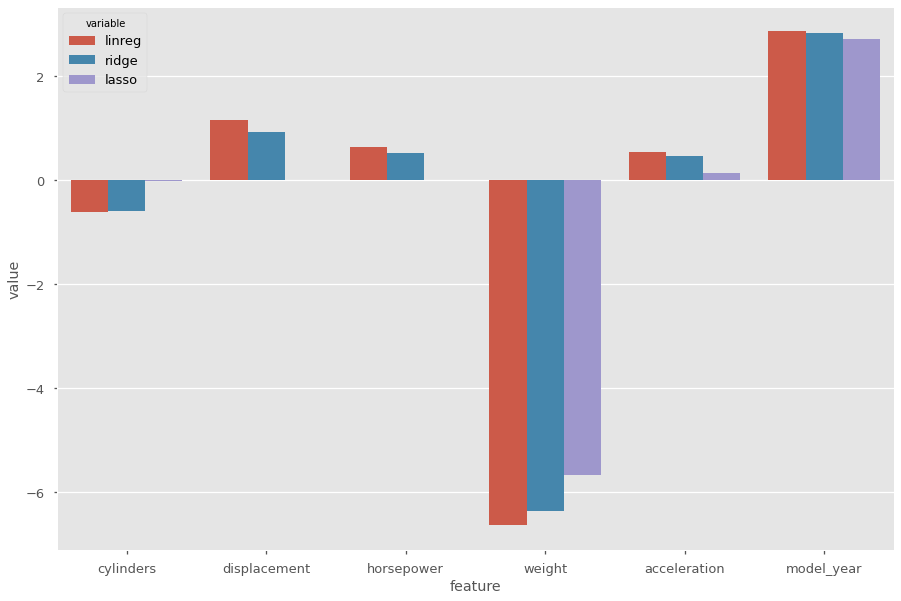

In [109]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='feature', y='value', hue='variable', data=melted, ax=ax)